In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
def pre_process_dataset_train_n_valid(file_name):
    try:
        # reading input csv file
        train_full_df = pd.read_csv(file_name, index_col = False)
        
        # Spliting the data into training and validation
        train_df, validation_df = train_test_split(train_full_df, test_size = 0.2, random_state =420, shuffle = True)
        
        # Handling NaN values
        train_df = train_df.fillna(0)
        validation_df = validation_df.fillna(0)
        
        # Handling -1 values and replacing with 0
        train_df = train_df.replace(-1,0)
        validation_df = validation_df.replace(-1,0)
        
        # Re-ordering the columns
        reordered_columns = ["Path","Atelectasis","Cardiomegaly","Consolidation","Edema","Pleural Effusion",
                            "Pleural Other","Pneumonia","Pneumothorax","Enlarged Cardiomediastinum",
                            "Lung Opacity","Lung Lesion","Fracture","Support Devices","No Finding"]
        
        train_df = train_df[reordered_columns]
        validation_df = validation_df[reordered_columns]
        
        # Converting Datatype of the columns to int type
        train_df[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema','Pleural Effusion', 'Pleural Other', 'Pneumonia',
                  'Pneumothorax','Enlarged Cardiomediastinum', 'Lung Opacity', 'Lung Lesion', 'Fracture', 'Support Devices', 'No Finding']] = train_df[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema','Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax','Enlarged Cardiomediastinum',
                                                                                                                                                          'Lung Opacity', 'Lung Lesion', 'Fracture','Support Devices', 'No Finding']].astype('int')
        validation_df[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema','Pleural Effusion', 'Pleural Other', 'Pneumonia',
                  'Pneumothorax','Enlarged Cardiomediastinum', 'Lung Opacity', 'Lung Lesion', 'Fracture', 'Support Devices', 'No Finding']] = validation_df[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema','Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax','Enlarged Cardiomediastinum',
                                                                                                                                                          'Lung Opacity', 'Lung Lesion', 'Fracture','Support Devices', 'No Finding']].astype('int')
        
        # Re-naming the Cols
        train_df.rename(columns={'Pleural Effusion':'Pleural_Effusion','Pleural Other':'Pleural_Other','Enlarged Cardiomediastinum':'Enlarged_Cardiomediastinum','Lung Opacity':'Lung_Opacity','Lung Lesion':'Lung_Lesion','Support Devices':'Support_Devices','No Finding':'No_Finding'}, inplace=True)
        train_df.reset_index(drop=True)
        
        validation_df.rename(columns={'Pleural Effusion':'Pleural_Effusion','Pleural Other':'Pleural_Other','Enlarged Cardiomediastinum':'Enlarged_Cardiomediastinum','Lung Opacity':'Lung_Opacity','Lung Lesion':'Lung_Lesion','Support Devices':'Support_Devices','No Finding':'No_Finding'}, inplace=True)
        validation_df.reset_index(drop=True)
        return train_df , validation_df
    
    except Exception as err:
        print('Info:', err)

In [4]:
def pre_process_dataset_test(file_name):
    try:
        test_full_df = pd.read_csv(file_name, index_col= False)
        
        # Handling NaN Values
        test_df = test_full_df.fillna(0)
        
        # Replacing -1 values with 0
        test_df = test_df.replace(-1, 0)
        
        # Re-ordering the columns
        reordered_columns = ["Path","Atelectasis","Cardiomegaly","Consolidation","Edema","Pleural Effusion",
                            "Pleural Other","Pneumonia","Pneumothorax","Enlarged Cardiomediastinum",
                            "Lung Opacity","Lung Lesion","Fracture","Support Devices","No Finding"]
        
        test_df = test_df[reordered_columns]
        
        # Converting Datatype of the columns to int type
        test_df[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema','Pleural Effusion', 'Pleural Other', 'Pneumonia',
                  'Pneumothorax','Enlarged Cardiomediastinum', 'Lung Opacity', 'Lung Lesion', 'Fracture', 'Support Devices', 'No Finding']] = test_df[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema','Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax','Enlarged Cardiomediastinum',
                                                                                                                                                          'Lung Opacity', 'Lung Lesion', 'Fracture','Support Devices', 'No Finding']].astype('int')
        # Renaming Columns 
        test_df.rename(columns={'Pleural Effusion':'Pleural_Effusion','Pleural Other':'Pleural_Other','Enlarged Cardiomediastinum':'Enlarged_Cardiomediastinum','Lung Opacity':'Lung_Opacity','Lung Lesion':'Lung_Lesion','Support Devices':'Support_Devices','No Finding':'No_Finding'}, inplace=True)
        return test_df
    except Exception as err:
        print('Info:', err)

In [5]:
train_file_name = '/kaggle/input/chexpert-filtered-data/train_filtered.csv'

In [6]:
test_file_name = '/kaggle/input/chexpert-filtered-data/valid_filtered.csv'

In [7]:
train_df , validation_df = pre_process_dataset_train_n_valid(train_file_name)

In [8]:
test_df = pre_process_dataset_test(test_file_name)

In [9]:
columns = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema','Pleural_Effusion', 'Pleural_Other', 'Pneumonia', 'Pneumothorax',
       'Enlarged_Cardiomediastinum', 'Lung_Opacity', 'Lung_Lesion', 'Fracture','Support_Devices', 'No_Finding']

In [10]:
datagen = ImageDataGenerator(rescale = 1./255.)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [12]:
train_generator = datagen.flow_from_dataframe(dataframe = train_df[:20000], directory = '/kaggle/input/chexpert', x_col = "Path", y_col= columns, batch_size = 16, seed = 42, shuffle = True, class_mode = "raw", target_size = (224, 224))

Found 20000 validated image filenames.


In [13]:
valid_generator = datagen.flow_from_dataframe(dataframe = validation_df[:3000], directory = '/kaggle/input/chexpert', x_col = "Path", y_col= columns, batch_size = 16, seed = 42, shuffle = True, class_mode = "raw", target_size = (224, 224))

Found 3000 validated image filenames.


In [14]:
test_generator = datagen.flow_from_dataframe(dataframe = test_df, directory = '/kaggle/input/chexpert', x_col = "Path", y_col= columns, batch_size = 16, seed = 42, shuffle = True, class_mode = "raw", target_size = (224, 224))

Found 169 validated image filenames.


**Model Architeture Begins**

**VGG19**

In [15]:
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

In [16]:
conv_base = VGG19(include_top = False, weights = '/kaggle/input/keras-models/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape = (224,224,3))

for layer in conv_base.layers:
    layer.trainable = False
    
inp = Input((224,224,3))
top_model = conv_base(inp)
top_model = Flatten(name = 'Flatten')(top_model)
top_model = Dense(1024, activation= 'relu', name = 'Dense_1024')(top_model)
top_model = BatchNormalization()(top_model)
top_model = Dense(512, activation='relu', name = 'Dense_512')(top_model)
output_layer = Dense(14, activation = 'sigmoid', name= 'Output_layer')(top_model)

model = Model(inputs = inp, outputs = output_layer)

optim_1 = Adam(lr = 0.00001, beta_1= 0.9, beta_2 = 0.999, epsilon = 0.1)

model.compile(optimizer = optim_1, loss = "binary_crossentropy", metrics = ["accuracy"])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 Flatten (Flatten)           (None, 25088)             0         
                                                                 
 Dense_1024 (Dense)          (None, 1024)              25691136  
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 Dense_512 (Dense)           (None, 512)               524800    
                                                             

In [18]:
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_generator, validation_steps=STEP_SIZE_VALID, epochs=15)

Epoch 1/15
1250/1250 [==============================] - 202s 153ms/step - loss: 0.3960 - accuracy: 0.1159 - val_loss: 0.3358 - val_accuracy: 0.1073
Epoch 2/15
1250/1250 [==============================] - 124s 99ms/step - loss: 0.3250 - accuracy: 0.1292 - val_loss: 0.3289 - val_accuracy: 0.1257
Epoch 3/15
1250/1250 [==============================] - 124s 99ms/step - loss: 0.3100 - accuracy: 0.1439 - val_loss: 0.3316 - val_accuracy: 0.1748
Epoch 4/15
1250/1250 [==============================] - 129s 103ms/step - loss: 0.2994 - accuracy: 0.1515 - val_loss: 0.3235 - val_accuracy: 0.1664
Epoch 5/15
1250/1250 [==============================] - 124s 99ms/step - loss: 0.2891 - accuracy: 0.1666 - val_loss: 0.3251 - val_accuracy: 0.1340
Epoch 6/15
1250/1250 [==============================] - 124s 99ms/step - loss: 0.2802 - accuracy: 0.1731 - val_loss: 0.3295 - val_accuracy: 0.1430
Epoch 7/15
1250/1250 [==============================] - 129s 103ms/step - loss: 0.2718 - accuracy: 0.1844 - val_loss

In [19]:
model.save('/kaggle/working/vgg19_1024_BN_512_sigmoid_00001.hdf5')

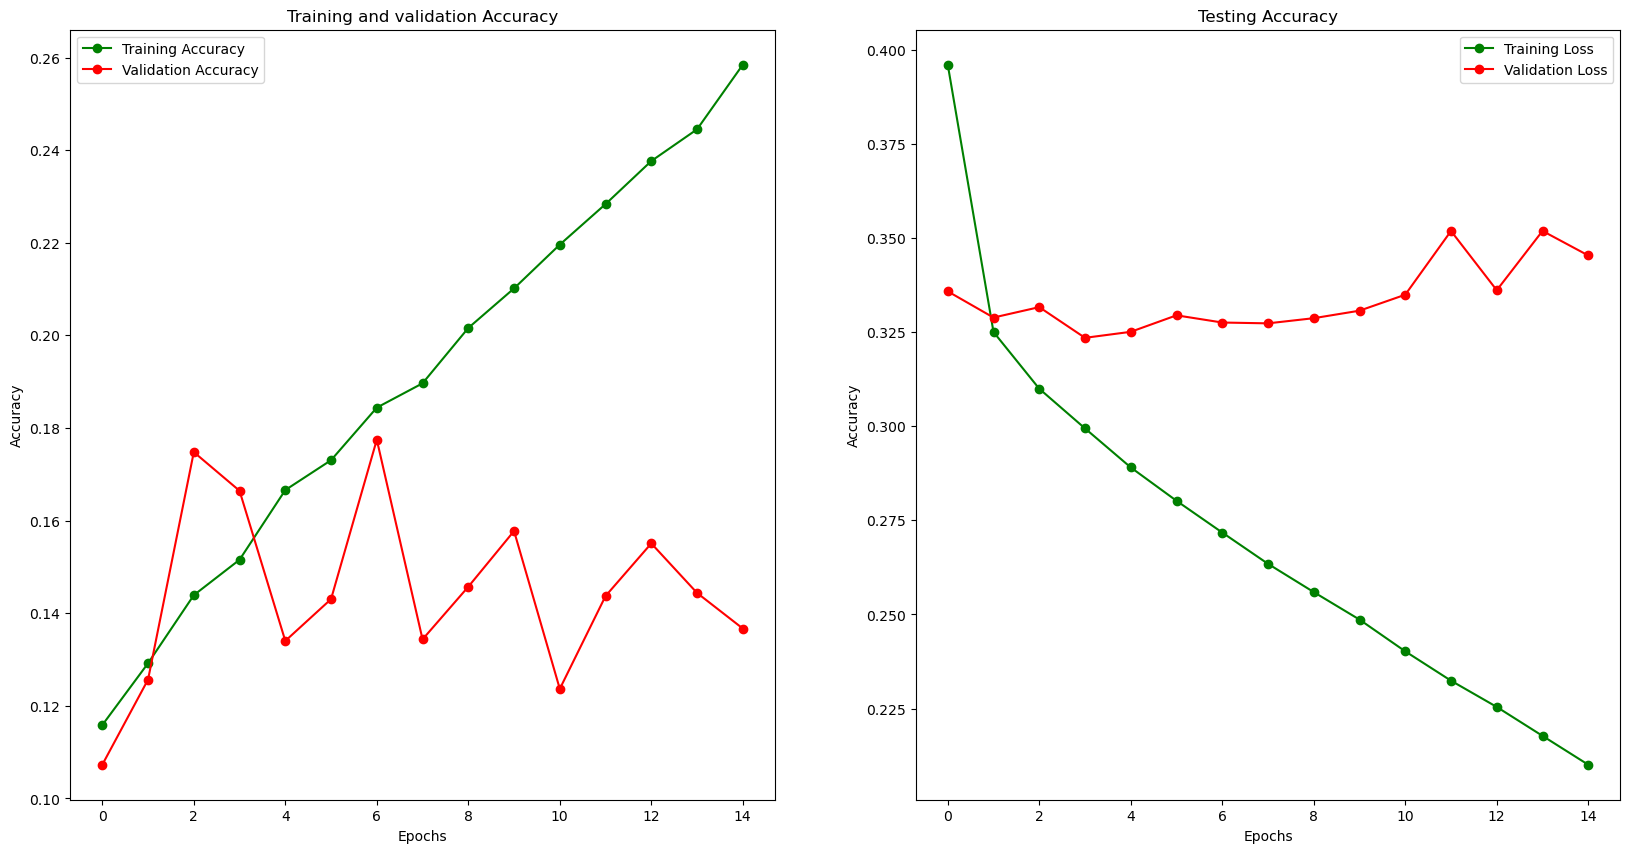

In [20]:
epochs = [i for i in range(15)]
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training and validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'go-', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'ro-', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.show()

In [21]:
model_stat_den=pd.DataFrame({
    "Epoch":[i+1 for i in (epochs)],
    "Training Loss":history.history['loss'],
    "Test Loss":history.history['val_loss'],
    "Training Accuracy":history.history['accuracy'],
    "Test Accuracy":history.history['val_accuracy']
})

In [22]:
model_stat_den.to_csv('/kaggle/working/vgg19_1024_BN_512_sigmoid_00001.csv')

**Archotecture No-2**

**Adam**

**learning rate= 0.0001**

In [23]:
conv_base = VGG19(include_top = False, weights = '/kaggle/input/keras-models/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape = (224,224,3))

for layer in conv_base.layers:
    layer.trainable = False
    
inp = Input((224,224,3))
top_model_2 = conv_base(inp)
top_model_2 = Flatten(name = 'Flatten')(top_model_2)
top_model_2 = Dense(1024, activation= 'relu', name = 'Dense_1024')(top_model_2)
top_model_2 = BatchNormalization()(top_model_2)
top_model_2 = Dense(512, activation='relu', name = 'Dense_512')(top_model_2)
output_layer_2 = Dense(14, activation = 'sigmoid', name= 'Output_layer')(top_model_2)

model_2 = Model(inputs = inp, outputs = output_layer_2)

optim_2 = Adam(lr = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon = 0.1)

model_2.compile(optimizer = optim_2, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history_2 = model_2.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_generator, validation_steps=STEP_SIZE_VALID, epochs=15)

Epoch 1/15
1250/1250 [==============================] - 126s 99ms/step - loss: 0.3968 - accuracy: 0.1037 - val_loss: 0.3356 - val_accuracy: 0.1310
Epoch 2/15
1250/1250 [==============================] - 128s 102ms/step - loss: 0.3259 - accuracy: 0.1260 - val_loss: 0.3269 - val_accuracy: 0.1444
Epoch 3/15
1250/1250 [==============================] - 128s 103ms/step - loss: 0.3116 - accuracy: 0.1391 - val_loss: 0.3248 - val_accuracy: 0.1608
Epoch 4/15
1250/1250 [==============================] - 128s 102ms/step - loss: 0.3005 - accuracy: 0.1521 - val_loss: 0.3245 - val_accuracy: 0.1537
Epoch 5/15
1250/1250 [==============================] - 129s 103ms/step - loss: 0.2909 - accuracy: 0.1612 - val_loss: 0.3235 - val_accuracy: 0.1240
Epoch 6/15
1250/1250 [==============================] - 123s 98ms/step - loss: 0.2821 - accuracy: 0.1710 - val_loss: 0.3229 - val_accuracy: 0.1410
Epoch 7/15
1250/1250 [==============================] - 123s 98ms/step - loss: 0.2748 - accuracy: 0.1801 - val_los

In [ ]:
model.save('/kaggle/working/vgg19_1024_BN_512_sigmoid_0001.hdf5')

In [ ]:
epochs = [i for i in range(15)]
fig, ax = plt.subplots(1,2)
train_acc = history_2.history['accuracy']
train_loss = history_2.history['loss']
val_acc = history_2.history['val_accuracy']
val_loss = history_2.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training and validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'go-', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'ro-', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.show()